In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
da = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")

In [3]:
da.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...>

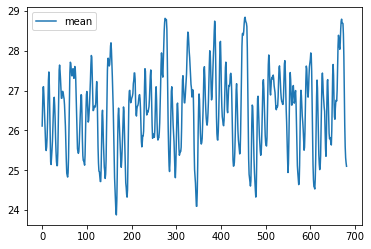

In [117]:
res_mean=[]
temp=[]
for i in range(0,684):
    temp = da.sst.isel(time=i).sel(lat=slice(-5,5),lon=slice(210,240)).mean()
    # time = slice(0,680)
    res_mean = np.append(res_mean,temp)
    
##  The criteria, that is often used to classify El Niño episodes, 
# is that five consecutive 3-month running mean SST anomalies exceed the threshold.

def moving_average(x,w):
    return np.convolve(x, np.ones(w),'valid') / w

res = moving_average(res_mean,3)


# 3-Month Running Means of SST
# 'JFM','FMA','MAM','AMJ','MJJ','JJA','JAS','OND','NDJ','DJF'
alist = ['JFM','FMA','MAM','AMJ','MJJ','JJA','JAS','OND','NDJ','DJF']
templist=[]
for i in range(0,68):
    for j in range(0,10):
        templist.append(alist[j])
# pd.DataFrame(res,columns=templist)
templist.append('JFM')
templist.append('FMA')
# list(map(list, zip(*templist)))

df = pd.DataFrame(test,columns=['mean'])
df['mo'] = pd.DataFrame(templist)
df.plot()

def get_date_list(begin_date,end_date):
    date_list = [x.strftime('%Y-%m-%d') for x in list(pd.date_range(start=begin_date,end=end_date,freq='M'))]
    return date_list
date = get_date_list('1960-01-15','2016-12-15')
df['date'] = pd.DataFrame(date)


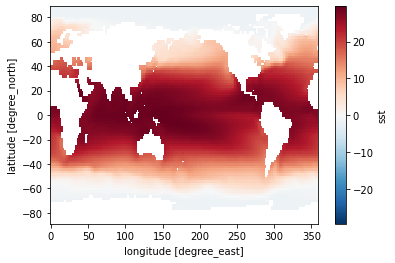

In [10]:
da.sst.mean(dim=['time']).plot()